In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import statsmodels.formula.api as smf

In [233]:
main_path = "C:/Users/HP/OneDrive/Bureau/M1 Eco Stat/S2/Python - ML"

In [234]:
cars_path = main_path + "/used_cars_data.csv"
#df = pd.read_csv(cars_path, sep=",")

In [235]:
cars_shorter_path = main_path + "/used_cars_data_shorter.csv"
df = pd.read_csv(cars_shorter_path, sep=",")

In [236]:
df.head(15)

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,1FMCU0GD1HUE23079,37.3 in,NaN,SUV / Crossover,23.0,NaN,41,I4,2000.0,I4,...,"275 lb-ft @ 3,000 RPM",A,Automatic,t66217,SE FWD,FWD,Front-Wheel Drive,105.9 in,81.8 in,2017
1,19XFC2F69LE019571,37.4 in,NaN,Sedan,30.0,NaN,72,I4,2000.0,I4,...,"138 lb-ft @ 4,200 RPM",CVT,Continuously Variable Transmission,t88293,LX Sedan FWD,FWD,Front-Wheel Drive,106.3 in,70.8 in,2020
2,JTHGZ5BC7L5023015,27.3 in,NaN,Coupe,20.0,NaN,26,V6,3500.0,V6,...,"280 lb-ft @ 4,800 RPM",A,Automatic,t89569,350 F Sport RWD,RWD,Rear-Wheel Drive,107.5 in,80.6 in,2020
3,KL4MMDS26LB105933,36 in,NaN,SUV / Crossover,26.0,NaN,155,I3,1300.0,I3,...,"174 lb-ft @ 1,500 RPM",CVT,Continuously Variable Transmission,t88215,Select FWD,FWD,Front-Wheel Drive,102.2 in,71.4 in,2020
4,KM8J3CA40LU171791,38.2 in,NaN,SUV / Crossover,22.0,NaN,98,I4,2000.0,I4,...,"150 lb-ft @ 4,700 RPM",A,6-Speed Automatic,t87604,Value AWD,AWD,All-Wheel Drive,105.1 in,72.8 in,2020
5,1V2DP2CA1MC521048,37.6 in,NaN,SUV / Crossover,NaN,NaN,11,I4,2000.0,I4,...,NaN,A,8-Speed Automatic Overdrive,t92306,2.0T SE FWD,FWD,Front-Wheel Drive,117.3 in,78.4 in,2021
6,3GKALMEV7LL313324,39.7 in,NaN,SUV / Crossover,26.0,NaN,41,I4,1500.0,I4,...,NaN,A,Automatic,t85779,SLE FWD,FWD,Front-Wheel Drive,107.3 in,72.4 in,2020
7,WBSAE0C09LCD87728,29.5 in,NaN,Coupe,15.0,NaN,229,V8,4400.0,V8,...,"553 lb-ft @ 1,800 RPM",A,8-Speed Automatic,t90341,Competition Coupe AWD,AWD,All-Wheel Drive,111.3 in,84.1 in,2020
8,5FNRL6H75LB067203,40.9 in,NaN,Minivan,19.0,NaN,70,V6,3500.0,V6,...,"262 lb-ft @ 4,700 RPM",A,Automatic,t88364,EX-L FWD with Navigation and RES,FWD,Front-Wheel Drive,118.1 in,92.3 in,2020
9,1C4HJXFN7LW223035,38.3 in,NaN,SUV / Crossover,21.0,NaN,266,I4,2000.0,I4,...,"442 lb-ft @ 1,400 RPM",A,8-Speed Automatic,t86722,Rubicon 4WD,4WD,Four-Wheel Drive,118.4 in,73.8 in,2020


In [237]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 907164 entries, 0 to 907163
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   907164 non-null  str    
 1   back_legroom          860875 non-null  str    
 2   bed_length            127568 non-null  str    
 3   body_type             902497 non-null  str    
 4   city_fuel_economy     770220 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          907164 non-null  int64  
 7   engine_cylinders      878418 non-null  str    
 8   engine_displacement   854176 non-null  float64
 9   engine_type           878418 non-null  str    
 10  fleet                 338708 non-null  object 
 11  franchise_dealer      907164 non-null  bool   
 12  franchise_make        827083 non-null  str    
 13  front_legroom         860875 non-null  str    
 14  fuel_tank_volume      860875 non-null  str    
 15  fuel_type  

**Filtres pour homogeneiser et fiabiliser les données**

In [238]:
SEED = 32
df_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)

## <span style="color:#011C5D">2. EDA</span>

In [239]:
df_train.info()

<class 'pandas.DataFrame'>
Index: 725731 entries, 53223 to 10967
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   725731 non-null  str    
 1   back_legroom          688744 non-null  str    
 2   bed_length            102192 non-null  str    
 3   body_type             722004 non-null  str    
 4   city_fuel_economy     616133 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          725731 non-null  int64  
 7   engine_cylinders      702734 non-null  str    
 8   engine_displacement   683410 non-null  float64
 9   engine_type           702734 non-null  str    
 10  fleet                 271014 non-null  object 
 11  franchise_dealer      725731 non-null  bool   
 12  franchise_make        661552 non-null  str    
 13  front_legroom         688744 non-null  str    
 14  fuel_tank_volume      688744 non-null  str    
 15  fuel_type    

In [240]:
df_test.info()

<class 'pandas.DataFrame'>
Index: 181433 entries, 22447 to 886202
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   181433 non-null  str    
 1   back_legroom          172131 non-null  str    
 2   bed_length            25376 non-null   str    
 3   body_type             180493 non-null  str    
 4   city_fuel_economy     154087 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          181433 non-null  int64  
 7   engine_cylinders      175684 non-null  str    
 8   engine_displacement   170766 non-null  float64
 9   engine_type           175684 non-null  str    
 10  fleet                 67694 non-null   object 
 11  franchise_dealer      181433 non-null  bool   
 12  franchise_make        165531 non-null  str    
 13  front_legroom         172131 non-null  str    
 14  fuel_tank_volume      172131 non-null  str    
 15  fuel_type   

In [187]:
print(df_train.columns.tolist())

['vin', 'back_legroom', 'bed_length', 'body_type', 'city_fuel_economy', 'combine_fuel_economy', 'daysonmarket', 'engine_cylinders', 'engine_displacement', 'engine_type', 'fleet', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'height', 'highway_fuel_economy', 'horsepower', 'is_new', 'is_oemcpo', 'length', 'listed_date', 'listing_color', 'listing_id', 'major_options', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'power', 'price', 'sp_name', 'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'year']


#### <span style="color:#011C5D">Type des variables</span>

- **Variables catégorielles** : body_type, engine_cylinders, engine_type, franchise_dealer, franchise_make, fuel_type, is_new, is_oemcpo, listing_color, make_new, transmission, transmission_display, wheel_system, wheel_system_display, year, maximum_seating
- **Variables numériques** : city_fuel_economy, daysonmarket, engine_displacement, highway_fuel_economy, horsepower, price
- **Variables mixes** : back_legroom, front_legroom, fuel_tank_volume, height, length, wheelbase, width, power, torque, _listed_ date_
- **Variables textuelles** : model_name, sp_name, trim_name
- **Variables d'ID** : listing_id, trimId

### <span style="color:#011C5D">Statistiques univariées</span>

**variables numériques**


ici on les a trouvé une par une à partir de la DB, mais il y'a surement une maniere de les trouver directement

In [241]:
num_var = [ "city_fuel_economy", "daysonmarket", "engine_displacement", "highway_fuel_economy", "horsepower", "price"]

df_train[num_var].describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,price
count,616133.000000,725731.000000,683410.000000,616133.000000,683410.000000,7.257310e+05
mean,23.372704,76.874981,2844.535930,29.974254,246.152412,3.324083e+04
std,9.418447,85.658028,1302.593511,8.051086,90.852728,1.889750e+04
min,8.000000,0.000000,700.000000,11.000000,55.000000,2.990000e+02
25%,18.000000,18.000000,2000.000000,25.000000,174.000000,2.198800e+04
50%,22.000000,41.000000,2500.000000,29.000000,240.000000,2.909600e+04
75%,26.000000,95.000000,3500.000000,33.000000,300.000000,4.097300e+04
max,127.000000,364.000000,8400.000000,127.000000,949.000000,2.749950e+06


Ces statistiques descriptives très générales nous permettent de réaliser quelques constats :
- **Une forte saisonnalité des prix** : On observe une différence de près de 7 000 dollars entre les prix moyens de mai et de décembre, suggérant que le moment de la mise en ligne est crucial.
- **Un daysonmarket automobile extrêmement récent** : Plus de 93 % des véhicules de l'échantillon ont été listés en 2020, ce qui indique un dataset concentré sur le marché très récent.
- **Une grande hétérogénéité des prix** : Les prix varient énormément selon les caractéristiques, avec des véhicules allant de prix d'entrée de gamme jusqu'à des modèles de luxe plafonnés à 100 000 $ (après filtrage des outliers).
- **Une domination des moteurs puissants** : La moyenne des chevaux (horsepower) est assez élevée, et on note une corrélation visuelle forte entre la puissance et l'augmentation du prix.

<Axes: >

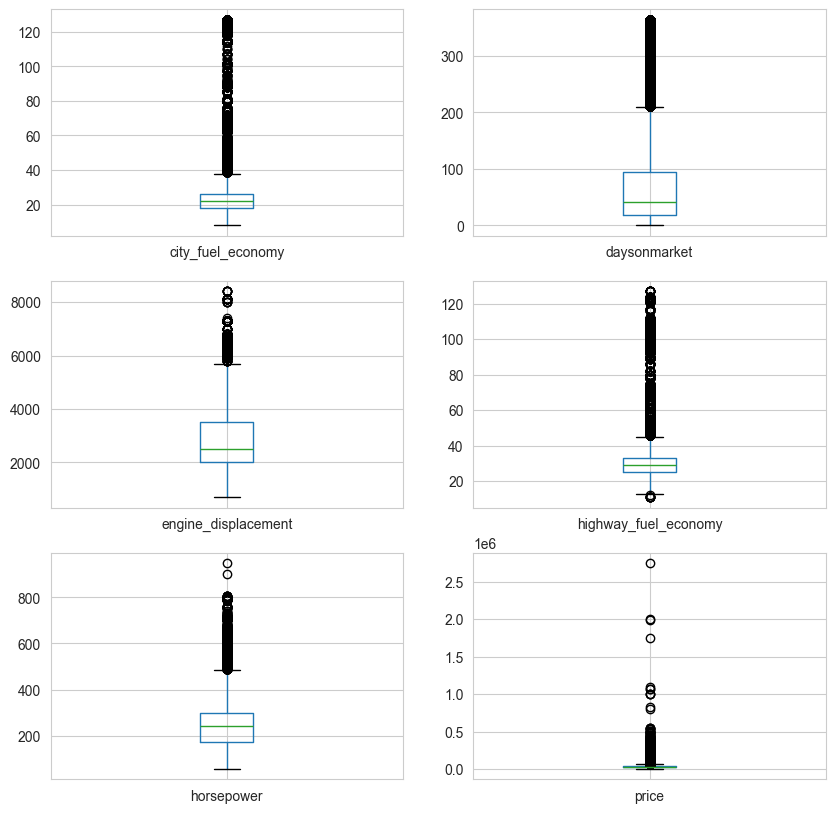

In [189]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

df_train.boxplot(column="city_fuel_economy", ax=axes[0,0])
df_train.boxplot(column="daysonmarket", ax=axes[0,1])
df_train.boxplot(column="engine_displacement", ax=axes[1,0])
df_train.boxplot(column="highway_fuel_economy", ax=axes[1,1])
df_train.boxplot(column="horsepower", ax=axes[2,0])
df_train.boxplot(column="price", ax=axes[2,1])

Les boxplots permettent de mettre en lumière d'éventuels outliers, selon la règle de l'écart-interquartile.

- **Pour le kilométrage (mileage)** ou **la puissance (horsepower)**, les outliers sont des phénomènes rares mais plausibles.

- **Pour le nombre de jours sur le marché (daysonmarket)**, certaines valeurs dépassant les 300 jours.

- **Pour le prix (price)** en revanche, on voit se détacher très nettement quelques observations au-delà de 100 000 $..

**variables catégorielle**


<Axes: xlabel='year'>

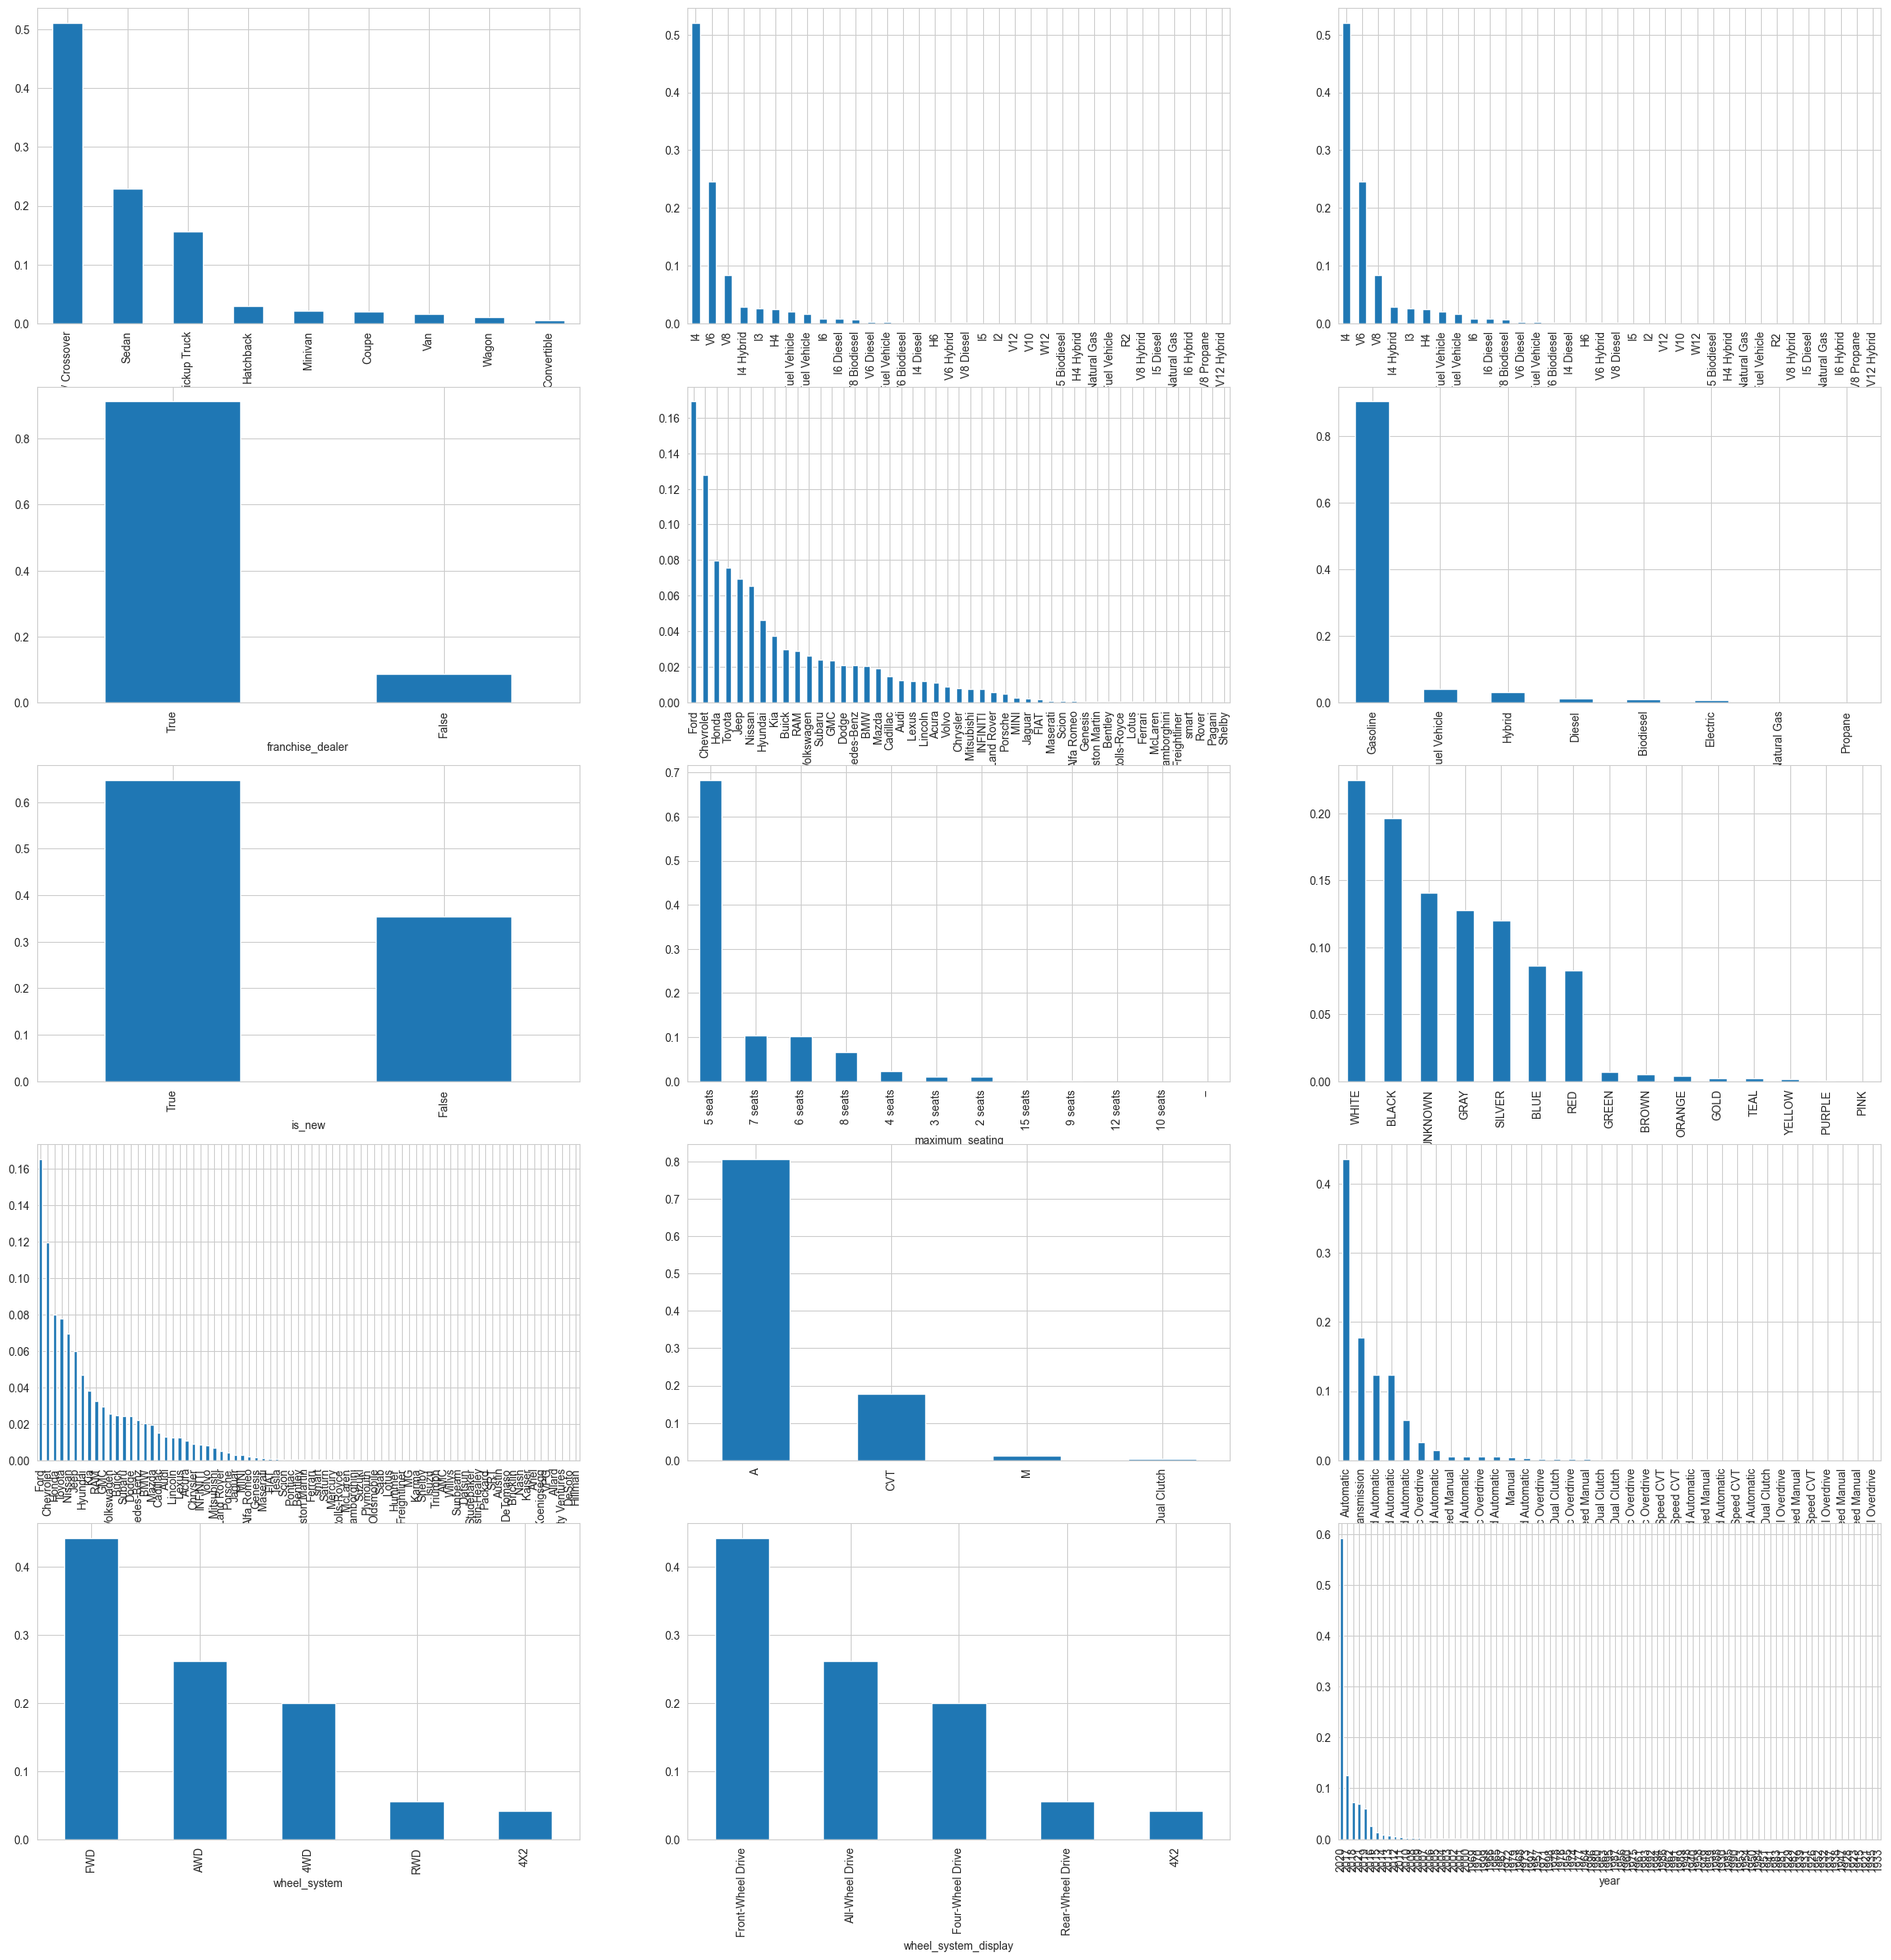

In [190]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 30)) #changer à 2 par ligne ?

df_train['body_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[0,0])
df_train['engine_cylinders'].value_counts(normalize=True).plot(kind='bar', ax=axes[0,1])
df_train['engine_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[0,2])

df_train['franchise_dealer'].value_counts(normalize=True).plot(kind='bar', ax=axes[1,0])
df_train['franchise_make'].value_counts(normalize=True).plot(kind='bar', ax=axes[1,1])
df_train['fuel_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[1,2])

df_train['is_new'].value_counts(normalize=True).plot(kind='bar', ax=axes[2,0])
df_train['maximum_seating'].value_counts(normalize=True).plot(kind='bar', ax=axes[2,1])
df_train['listing_color'].value_counts(normalize=True).plot(kind='bar', ax=axes[2,2])

df_train['make_name'].value_counts(normalize=True).plot(kind='bar', ax=axes[3,0])
df_train['transmission'].value_counts(normalize=True).plot(kind='bar', ax=axes[3,1])
df_train['transmission_display'].value_counts(normalize=True).plot(kind='bar', ax=axes[3,2])

df_train['wheel_system'].value_counts(normalize=True).plot(kind='bar', ax=axes[4,0])
df_train['wheel_system_display'].value_counts(normalize=True).plot(kind='bar', ax=axes[4,1])
df_train['year'].value_counts(normalize=True).plot(kind='bar', ax=axes[4,2])

### <span style="color:#011C5D">Statistiques bivariées</span>

#### <span style="color:#011C5D">Variable Catégorielle vs Prix</span>

#### <span style="color:#011C5D">Prix selon body_type</span>

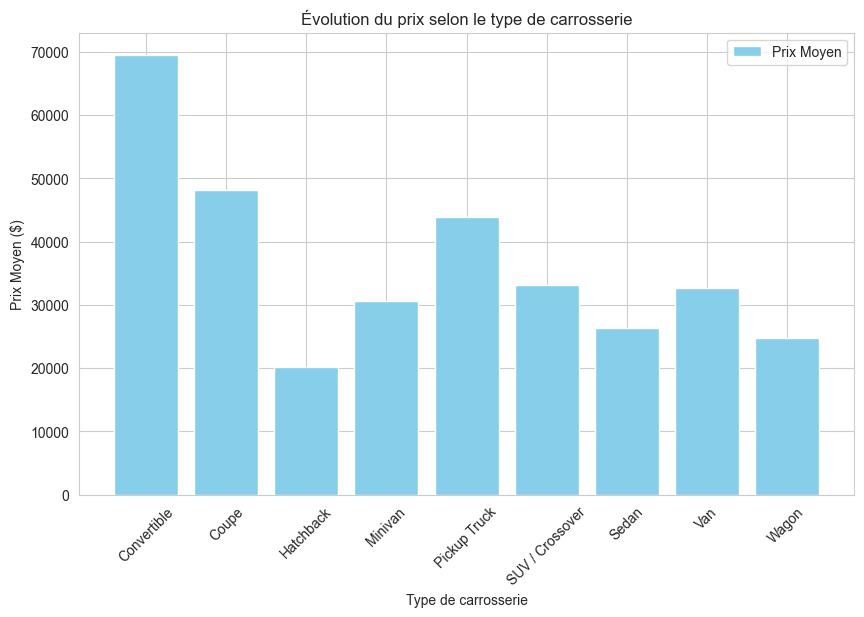

In [191]:
stats = df_train.groupby("body_type")['price'].mean().sort_index()
index = np.arange(len(stats))

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(index, stats, color='skyblue', label='Prix Moyen')

ax.set_xticks(index)
ax.set_xticklabels(stats.index, rotation=45)
ax.set_xlabel("Type de carrosserie")
ax.set_ylabel('Prix Moyen ($)')
ax.set_title("Évolution du prix selon le type de carrosserie")
ax.legend()
plt.show()

#### <span style="color:#011C5D">Prix selon fuel_type</span>

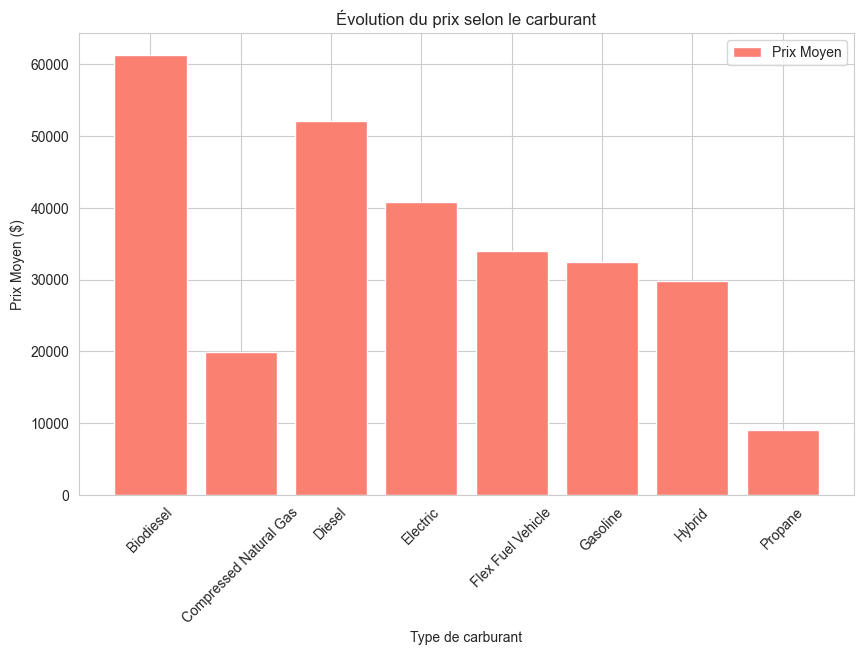

In [192]:
stats = df_train.groupby("fuel_type")['price'].mean().sort_index()
index = np.arange(len(stats))

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(index, stats, color='salmon', label='Prix Moyen')

ax.set_xticks(index)
ax.set_xticklabels(stats.index, rotation=45)
ax.set_xlabel("Type de carburant")
ax.set_ylabel('Prix Moyen ($)')
ax.set_title("Évolution du prix selon le carburant")
ax.legend()
plt.show()

#### <span style="color:#011C5D">Prix selon wheel_system</span>

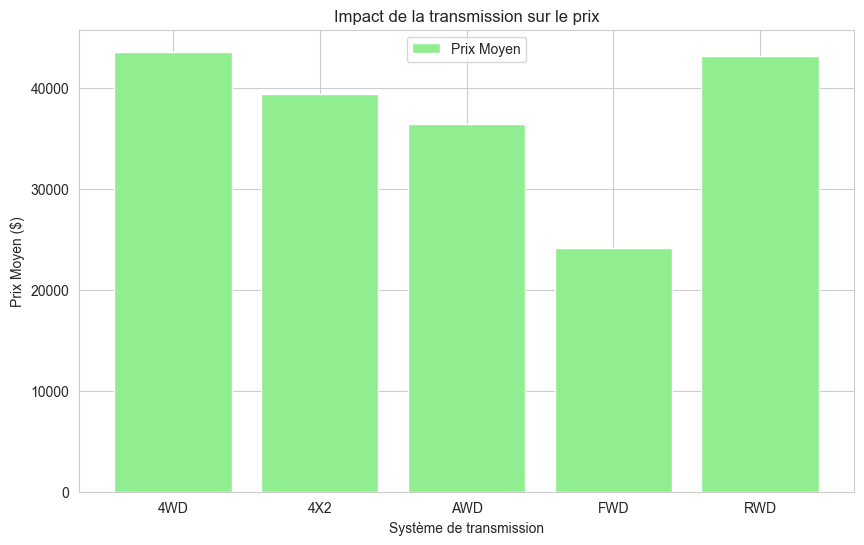

In [193]:
stats = df_train.groupby("wheel_system")['price'].mean().sort_index()
index = np.arange(len(stats))

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(index, stats, color='lightgreen', label='Prix Moyen')

ax.set_xticks(index)
ax.set_xticklabels(stats.index)
ax.set_xlabel("Système de transmission")
ax.set_ylabel('Prix Moyen ($)')
ax.set_title("Impact de la transmission sur le prix")
ax.legend()
plt.show()

#### <span style="color:#011C5D">Prix selon is_new</span>

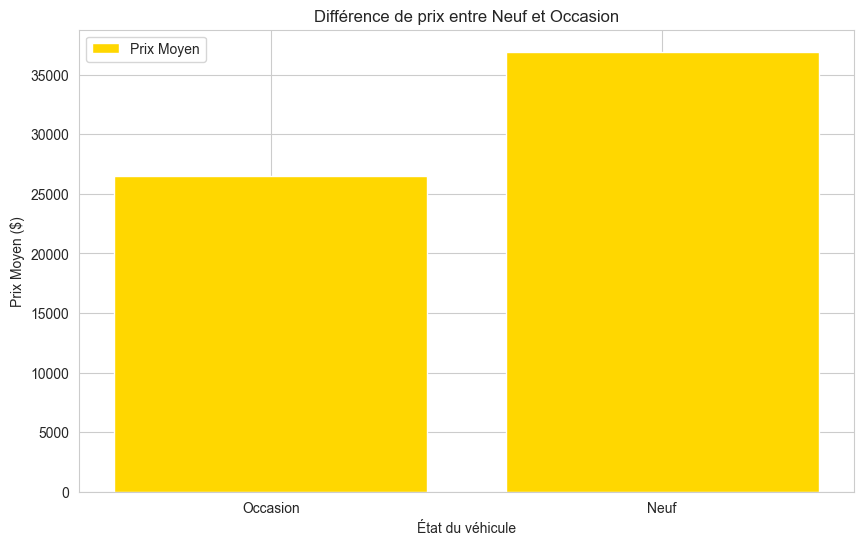

In [194]:
# Ici on compare Neuf vs Occasion
stats = df_train.groupby("is_new")['price'].mean().sort_index()
index = np.arange(len(stats))

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(index, stats, color='gold', label='Prix Moyen')

ax.set_xticks(index)
ax.set_xticklabels(['Occasion', 'Neuf']) # On renomme les labels 0/1 ou False/True
ax.set_xlabel("État du véhicule")
ax.set_ylabel('Prix Moyen ($)')
ax.set_title("Différence de prix entre Neuf et Occasion")
ax.legend()
plt.show()

#### <span style="color:#011C5D">Prix selon engine_type</span>

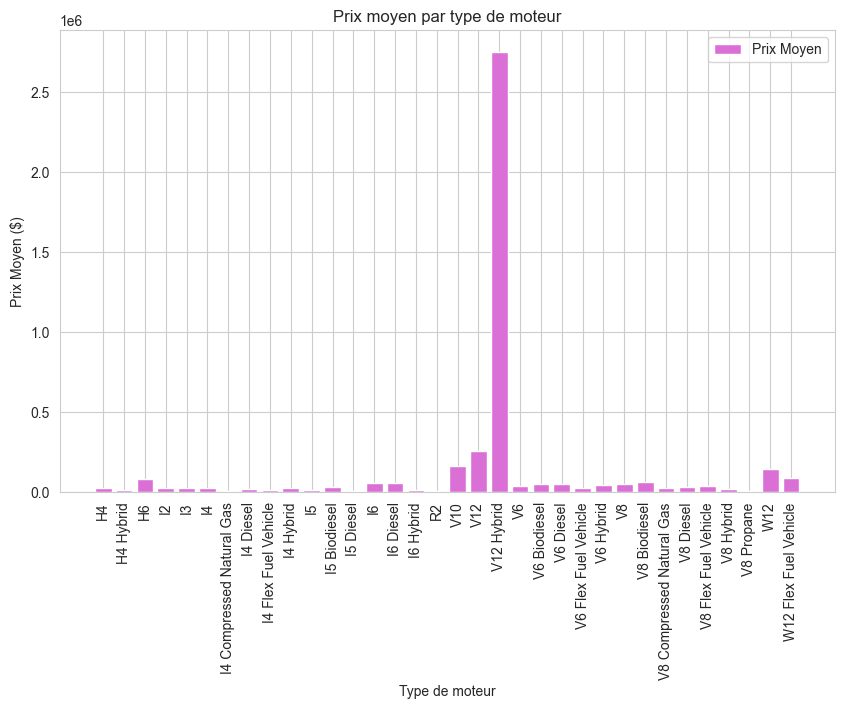

In [195]:
stats = df_train.groupby("engine_type")['price'].mean().sort_index()
index = np.arange(len(stats))

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(index, stats, color='orchid', label='Prix Moyen')

ax.set_xticks(index)
ax.set_xticklabels(stats.index, rotation=90) # Rotation à 90 car souvent beaucoup de types
ax.set_xlabel("Type de moteur")
ax.set_ylabel('Prix Moyen ($)')
ax.set_title("Prix moyen par type de moteur")
ax.legend()
plt.show()

#### <span style="color:#011C5D">Variable numérique vs Prix</span>

#### <span style="color:#011C5D">Prix selon highway_fuel_economy</span>

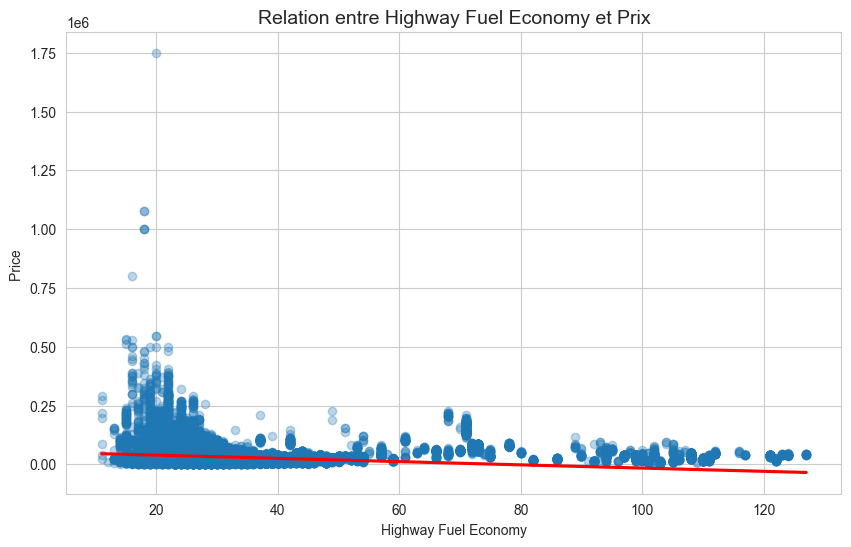

In [196]:
fig, ax = plt.subplots(figsize=(10,6))
# On trace les points et la droite de régression pour voir la tendance
sns.regplot(x='highway_fuel_economy', y='price', data=df_train, ax=ax,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

ax.set_title('Relation entre Highway Fuel Economy et Prix', fontsize=14)
ax.set_xlabel('Highway Fuel Economy')
ax.set_ylabel('Price ')
plt.show()

#### <span style="color:#011C5D">Prix selon horsepower</span>

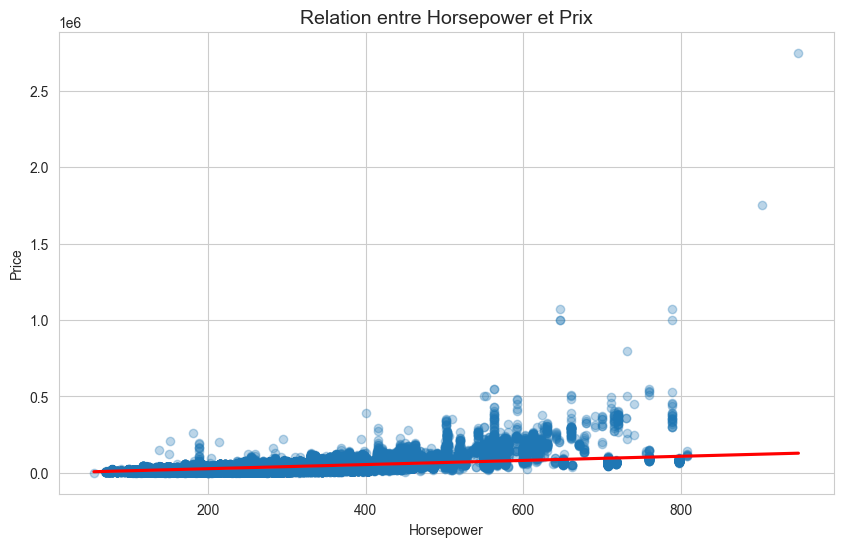

In [197]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='horsepower', y='price', data=df_train, ax=ax,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

ax.set_title('Relation entre Horsepower et Prix', fontsize=14)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Price')
plt.show()

#### <span style="color:#011C5D">Prix selon engine_displacement</span>

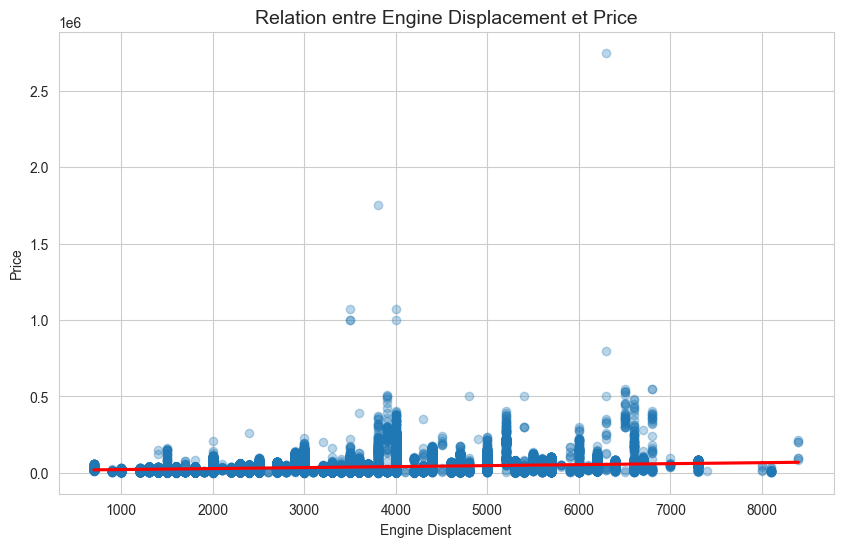

In [198]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='engine_displacement', y='price', data=df_train, ax=ax,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

ax.set_title('Relation entre Engine Displacement et Price', fontsize=14)
ax.set_xlabel('Engine Displacement')
ax.set_ylabel('Price')
plt.show()

### <span style="color:#011C5D">Statistiques multivariées</span>

#### <span style="color:#011C5D">Matrice des corrélations</span>

In [242]:
df_train[num_var].corr()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,price
city_fuel_economy,1.000000,0.023288,-0.634877,0.946750,-0.666450,-0.235522
daysonmarket,0.023288,1.000000,-0.083344,0.014743,-0.041794,0.077436
engine_displacement,-0.634877,-0.083344,1.000000,-0.661097,0.830605,0.459545
highway_fuel_economy,0.946750,0.014743,-0.661097,1.000000,-0.703131,-0.317602
horsepower,-0.666450,-0.041794,0.830605,-0.703131,1.000000,0.675461
price,-0.235522,0.077436,0.459545,-0.317602,0.675461,1.000000


<Axes: >

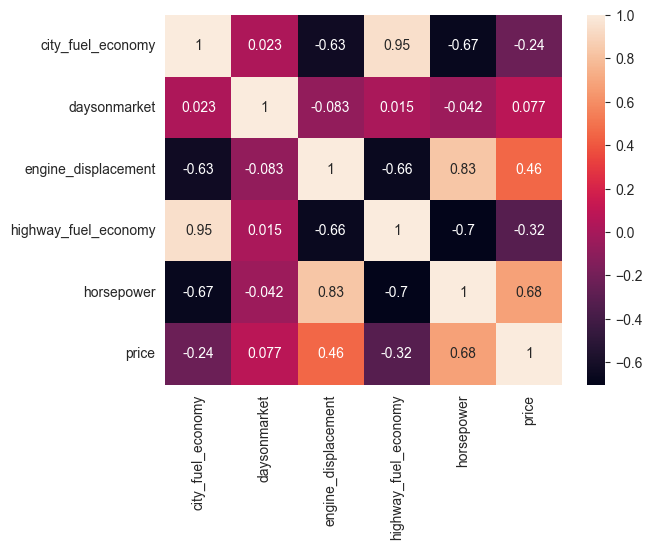

In [200]:
sns.heatmap(df_train[num_var].corr(), annot=True)

La matrice des corrélations permet d'estimer les corrélations entre les variables de type numérique. On retrouve un certain nombre de constats faits précédemment.
Par ailleurs, on observe  corrélation trop forte entre certains régresseurs, il n'y a donc pas a priori de risque de multicolinéarité.

- Consommation : city_fuel_economy vs highway_fuel_economy (corrélation 0.95).

- Puissance : engine_displacement vs horsepower (corrélation 0.83).

## <span style="color:#011C5D">3. Preprocessing</span>

#### <span style="color:#011C5D">les variables non pertinentes à supprimer</span>

**les variables à faible pouvoir explicatif:**


- **daysonmarket** : Selon la heatmap; elle a une corrélation de seulement 0.077 avec le prix. => on la supprime



**les variables textuelles/combined qui n'expliquent rien:**

- listing_id
- trimId
- trim_name
- vin
- sp_name
- torque
- power

deja on remarque que
- bed_length: beaucoup trop de NA
- is_oemcpo: beaucoup trop de NA
- combine_fuel_economy: que des NA
- fleet: beaucoup de false et true (tres peu)

donc on les drop

#### <span style="color:#011C5D">les colonnes visibles à supprimer</span>

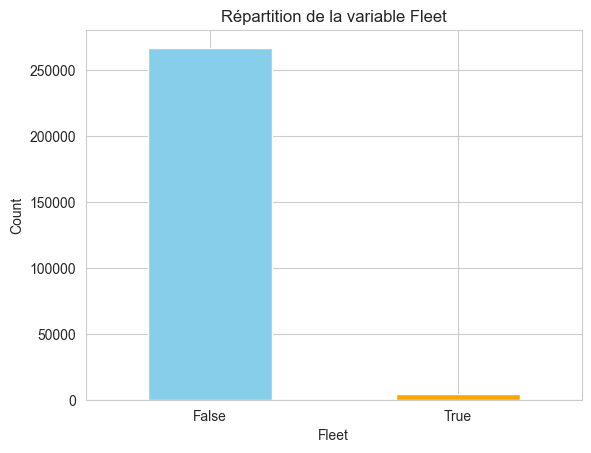

In [201]:
import matplotlib.pyplot as plt

df_train['fleet'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Répartition de la variable Fleet")
plt.xlabel("Fleet")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [202]:
df_train['bed_length'].isna().mean() * 100

np.float64(85.91874950911563)

In [203]:
df_train['combine_fuel_economy'].isna().mean() * 100

np.float64(100.0)

In [204]:
df_train['is_oemcpo'].isna().mean() * 100

np.float64(94.95584452090375)

#### <span style="color:#011C5D">les colonnes correlées</span>

et on a d'après la matrice de correlation: une forte correlation:
- city_fuel_economy vs highway_fuel_economy (corrélation 0.95).

- engine_displacement vs horsepower (corrélation 0.83).
==> ce qu'on va faire: on va regresser le prix sur chacune des deux variables correlées et on laisse celle qui explique le mieux le prix (R^2 le plus elevé)

**city_fuel_economy vs highway_fuel_economy (corrélation 0.95)**

In [205]:
r2_city = smf.ols('price ~ city_fuel_economy', data=df_train).fit().rsquared
r2_city


np.float64(0.055470817353153734)

In [206]:
r2_hwy = smf.ols('price ~ highway_fuel_economy', data=df_train).fit().rsquared
r2_hwy

np.float64(0.10087108177456194)

highway_fuel_economy explique le prix mieux que city_fuel_economy

donc on supprime la colonne city_fuel_economy

**engine_displacement vs horsepower (corrélation 0.83)**

In [207]:
r2_disp = smf.ols('price ~ engine_displacement', data=df_train).fit().rsquared
r2_disp

np.float64(0.21118173427430287)

In [208]:
r2_hp = smf.ols('price ~ horsepower', data=df_train).fit().rsquared
r2_hp

np.float64(0.4562473422931602)

horsepower explique le prix mieux que engine_displacement

donc on supprime la colonne engine_displacement

**les variables similaires**

- **engine_cylinders** VS **engine_type**

In [209]:
diff = df_train['engine_cylinders'].compare(df_train['engine_type'])

if diff.empty:
    print("Aucune différence trouvée.")
else:
    print("Voici les différences :")
    print(diff)

Aucune différence trouvée.


Vu qu'il n'y a aucune difference entre les deux, on supprime une des deux. Ici on choisit de supprimer **engine_cylinders**

- **wheel_system** VS **wheel_system_display**

In [210]:
df_train[['wheel_system_display', 'wheel_system']].head()

,wheel_system_display,wheel_system
53223,Front-Wheel Drive,FWD
161217,Front-Wheel Drive,FWD
661143,All-Wheel Drive,AWD
114956,All-Wheel Drive,AWD
341648,Front-Wheel Drive,FWD


Vu qu'il n'y a aucune difference entre les deux, elles sont juste ecrites de deux manieres differentes. On supprime une des deux.


Ici on choisit de supprimer **wheel_system_display**

- **transmission** VS **transmission_display**

In [211]:
df_train[['transmission', 'transmission_display']].head(10)

,transmission,transmission_display
53223,CVT,Continuously Variable Transmission
161217,A,8-Speed Automatic
661143,A,Automatic
114956,A,8-Speed Automatic
341648,CVT,Continuously Variable Transmission
869822,A,6-Speed Automatic
274029,A,8-Speed Automatic
493728,A,Automatic
821399,A,6-Speed Automatic
5843,A,Automatic


Vu qu'il n'y a aucune difference entre les deux, elles sont juste ecrites de deux manieres differentes. On supprime une des deux.


Ici on choisit de supprimer **transmission_display** car elle sera plus pertinante pour le FE (pour ne pas avoir bcp trop de variables)

#### **on supprime**

In [243]:
cols_to_drop = [
    "daysonmarket",
    "listing_id",
    "trimId",
    "trim_name",
    "vin",
    "fleet",
    "bed_length",
    "combine_fuel_economy",
    "is_oemcpo",
    "city_fuel_economy",
    "engine_displacement",
    "engine_cylinders",
    "wheel_system_display",
    "sp_name",
    "torque",
    "transmission_display",
    "power"
]

# On supprime ces colonnes de nos régresseurs
df_train_prepro = df_train.drop(columns=cols_to_drop)

df_train_prepro.columns.tolist()

['back_legroom',
 'body_type',
 'engine_type',
 'franchise_dealer',
 'franchise_make',
 'front_legroom',
 'fuel_tank_volume',
 'fuel_type',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'is_new',
 'length',
 'listed_date',
 'listing_color',
 'major_options',
 'make_name',
 'maximum_seating',
 'mileage',
 'model_name',
 'price',
 'transmission',
 'wheel_system',
 'wheelbase',
 'width',
 'year']

In [244]:
# Refaire la même chose mais pour le test
df_test_prepro = df_test.drop(columns=cols_to_drop)

#### <span style="color:#011C5D">Traitement des valeurs manquantes</span>

In [245]:
df_train_prepro.info()

<class 'pandas.DataFrame'>
Index: 725731 entries, 53223 to 10967
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          688744 non-null  str    
 1   body_type             722004 non-null  str    
 2   engine_type           702734 non-null  str    
 3   franchise_dealer      725731 non-null  bool   
 4   franchise_make        661552 non-null  str    
 5   front_legroom         688744 non-null  str    
 6   fuel_tank_volume      688744 non-null  str    
 7   fuel_type             708131 non-null  str    
 8   height                688744 non-null  str    
 9   highway_fuel_economy  616133 non-null  float64
 10  horsepower            683410 non-null  float64
 11  is_new                725731 non-null  bool   
 12  length                688744 non-null  str    
 13  listed_date           725731 non-null  str    
 14  listing_color         725731 non-null  str    
 15  major_options

- **Imputation des variables numériques par la médiane**

In [246]:
dimension_cols = [
    'back_legroom', 'front_legroom', 'fuel_tank_volume',
    'height', 'length', 'wheelbase', 'width', 'maximum_seating'
]

# On enlève tout ce qui n'est pas un chiffre ou un point (ex: "38 in" -> "38")
for col in dimension_cols:
    # On extrait les nombres
    df_train_prepro[col] = df_train_prepro[col].str.extract(r'(\d+\.?\d*)').astype(float)

In [247]:
# meme chose pour le test
for col in dimension_cols:
    df_test_prepro[col] = df_test_prepro[col].str.extract(r'(\d+\.?\d*)').astype(float)

In [248]:
# On recalcule la liste car les types ont changé !
num_cols = df_train_prepro.select_dtypes(include=['number']).columns
imp_median = SimpleImputer(strategy='median')

df_train_prepro[num_cols] = imp_median.fit_transform(df_train_prepro[num_cols])

In [249]:
#meme chose pour le test
df_test_prepro[num_cols] = imp_median.transform(df_test_prepro[num_cols])

- **Imputation des variables catégorielles par le mode**

In [250]:
# On liste les colonnes catégorielles
cat_cols = df_train_prepro.select_dtypes(include=['object', 'bool', 'string']).columns

for col in cat_cols:
    mode_value = df_train_prepro[col].mode()[0]

    df_train_prepro[col] = df_train_prepro[col].fillna(mode_value)

In [251]:
#meme chose pour le test
cat_cols = df_test_prepro.select_dtypes(include=['object', 'bool', 'string']).columns

for col in cat_cols:
    mode_value = df_test_prepro[col].mode()[0]

    df_test_prepro[col] = df_test_prepro[col].fillna(mode_value)

In [252]:
df_train_prepro.info()

<class 'pandas.DataFrame'>
Index: 725731 entries, 53223 to 10967
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          725731 non-null  float64
 1   body_type             725731 non-null  str    
 2   engine_type           725731 non-null  str    
 3   franchise_dealer      725731 non-null  bool   
 4   franchise_make        725731 non-null  str    
 5   front_legroom         725731 non-null  float64
 6   fuel_tank_volume      725731 non-null  float64
 7   fuel_type             725731 non-null  str    
 8   height                725731 non-null  float64
 9   highway_fuel_economy  725731 non-null  float64
 10  horsepower            725731 non-null  float64
 11  is_new                725731 non-null  bool   
 12  length                725731 non-null  float64
 13  listed_date           725731 non-null  str    
 14  listing_color         725731 non-null  str    
 15  major_options

In [253]:
df_test_prepro.info()

<class 'pandas.DataFrame'>
Index: 181433 entries, 22447 to 886202
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          181433 non-null  float64
 1   body_type             181433 non-null  str    
 2   engine_type           181433 non-null  str    
 3   franchise_dealer      181433 non-null  bool   
 4   franchise_make        181433 non-null  str    
 5   front_legroom         181433 non-null  float64
 6   fuel_tank_volume      181433 non-null  float64
 7   fuel_type             181433 non-null  str    
 8   height                181433 non-null  float64
 9   highway_fuel_economy  181433 non-null  float64
 10  horsepower            181433 non-null  float64
 11  is_new                181433 non-null  bool   
 12  length                181433 non-null  float64
 13  listed_date           181433 non-null  str    
 14  listing_color         181433 non-null  str    
 15  major_option

#### <span style="color:#011C5D">Feature engineering</span>

PSI=np.sum((train_count-test_count)*(np.log(train_count/test_count)))

print(PSI)

#### <span style="color:#011C5D">Standardisation</span>

In [256]:
# StandardScaler (centrer + réduire) : sur le prix
scaler=StandardScaler()
df_train_prepro[['priceSS']]=scaler.fit_transform(df_train_prepro[['price']])

#meme chose pour test
df_test_prepro[['priceSS']]=scaler.transform(df_test_prepro[['price']])

In [257]:
# Normalisation (Min-Max) : met les valeurs dans [0,1]
scaler=MinMaxScaler()
df_train_prepro[['priceMM']]=scaler.fit_transform(df_train_prepro[['price']])
#meme chose pour test
df_test_prepro[['priceMM']]=scaler.transform(df_test_prepro[['price']])

#### <span style="color:#011C5D">Les autres variables</span>

- age/year

In [258]:
# On calcule l'âge par rapport à l'année la plus récente (2020)
df_train_prepro['car_age'] = 2021 - df_train_prepro['year']
df_test_prepro['car_age'] = 2021 - df_test_prepro['year']

# On peut maintenant supprimer 'year' car 'car_age' contient la même info en plus utile
df_train_prepro = df_train_prepro.drop(columns=['year'])
df_test_prepro = df_test_prepro.drop(columns=['year'])

- Le "Nombre d'Options"

In [259]:

def count_options(x):
    try:
        # On transforme la chaîne "['Option1', 'Option2']" en liste Python
        options_list = ast.literal_eval(x)
        return len(options_list)
    except:
        return 0

df_train_prepro['options_count'] = df_train_prepro['major_options'].apply(count_options)
df_test_prepro['options_count'] = df_test_prepro['major_options'].apply(count_options)

# On supprime la colonne 'major_options'
df_train_prepro = df_train_prepro.drop(columns=['major_options'])
df_test_prepro = df_test_prepro.drop(columns=['major_options'])

- listed_date -> month pour capter la saisonnalité

- **listed_date** est inutile comme telle, donc on va essayer de capter la saisonnalité de la vente de voiture en creant une variable mois

In [254]:
df_train_prepro['listed_date'] = pd.to_datetime(df_train_prepro['listed_date'])
df_train_prepro['month'] = df_train_prepro['listed_date'].dt.month
df_train_prepro[['month']].head()

,month
53223,2
161217,8
661143,2
114956,10
341648,6


In [255]:
df_test_prepro['listed_date'] = pd.to_datetime(df_test_prepro['listed_date'])
df_test_prepro['month'] = df_test_prepro['listed_date'].dt.month
df_test_prepro[['month']].head()

,month
22447,8
492941,7
234835,9
464211,8
663264,7


In [260]:
# On supprime la colonne 'major_options'
df_train_prepro = df_train_prepro.drop(columns=['listed_date'])
df_test_prepro = df_test_prepro.drop(columns=['listed_date'])

- fuel_type:


In [264]:
print(df_train_prepro['fuel_type'].unique())

<StringArray>
[                'Hybrid',               'Gasoline',              'Biodiesel',
      'Flex Fuel Vehicle',                 'Diesel',               'Electric',
 'Compressed Natural Gas',                'Propane']
Length: 8, dtype: str


In [265]:
encoder_fuel = OneHotEncoder(sparse_output=False)


df_train_prepro[['Hybrid', 'Gasoline', 'Biodiesel', 'Flex Fuel Vehicle', 'Diesel', 'Electric', 'Compressed Natural Gas', 'Propane']] = encoder_fuel.fit_transform(df_train_prepro[["fuel_type"]])

# On fait la même chose pour le test
df_test_prepro[['Hybrid', 'Gasoline', 'Biodiesel', 'Flex Fuel Vehicle', 'Diesel', 'Electric', 'Compressed Natural Gas', 'Propane']] = encoder_fuel.transform(df_test_prepro[["fuel_type"]])


df_train_prepro = df_train_prepro.drop(columns=['fuel_type'])
df_test_prepro = df_test_prepro.drop(columns=['fuel_type'])

- transmission

In [266]:
df_train_prepro['transmission'].unique()

<StringArray>
['CVT', 'A', 'Dual Clutch', 'M']
Length: 4, dtype: str

In [268]:
encoder_transmission = OneHotEncoder(sparse_output=False)

df_train_prepro[['CVT', 'A', 'Dual Clutch', 'M']] = encoder_transmission.fit_transform(df_train_prepro[["transmission"]])

# On applique la transformation au test
df_test_prepro[['CVT', 'A', 'Dual Clutch', 'M']] = encoder_transmission.transform(df_test_prepro[["transmission"]])


df_train_prepro = df_train_prepro.drop(columns=['transmission'])
df_test_prepro = df_test_prepro.drop(columns=['transmission'])

In [269]:
df_train_prepro.info()

<class 'pandas.DataFrame'>
Index: 725731 entries, 53223 to 10967
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   back_legroom            725731 non-null  float64
 1   body_type               725731 non-null  str    
 2   engine_type             725731 non-null  str    
 3   franchise_dealer        725731 non-null  bool   
 4   franchise_make          725731 non-null  str    
 5   front_legroom           725731 non-null  float64
 6   fuel_tank_volume        725731 non-null  float64
 7   height                  725731 non-null  float64
 8   highway_fuel_economy    725731 non-null  float64
 9   horsepower              725731 non-null  float64
 10  is_new                  725731 non-null  bool   
 11  length                  725731 non-null  float64
 12  listing_color           725731 non-null  str    
 13  make_name               725731 non-null  str    
 14  maximum_seating         725731 no

In [262]:
df_test_prepro.info()

<class 'pandas.DataFrame'>
Index: 181433 entries, 22447 to 886202
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          181433 non-null  float64
 1   body_type             181433 non-null  str    
 2   engine_type           181433 non-null  str    
 3   franchise_dealer      181433 non-null  bool   
 4   franchise_make        181433 non-null  str    
 5   front_legroom         181433 non-null  float64
 6   fuel_tank_volume      181433 non-null  float64
 7   fuel_type             181433 non-null  str    
 8   height                181433 non-null  float64
 9   highway_fuel_economy  181433 non-null  float64
 10  horsepower            181433 non-null  float64
 11  is_new                181433 non-null  bool   
 12  length                181433 non-null  float64
 13  listing_color         181433 non-null  str    
 14  make_name             181433 non-null  str    
 15  maximum_seat